In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
len(X_train)


60000

In [4]:
len(X_test)


10000

In [5]:
X_train[0].shape


(28, 28)

In [6]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

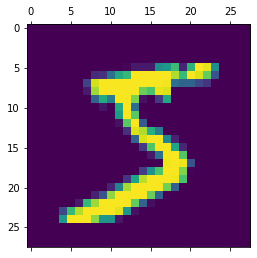

In [7]:
plt.matshow(X_train[0])


In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape


(60000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7272 - accuracy: 0.8106
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3127 - accuracy: 0.9136: 0s - los
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2860 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2626 - accuracy: 0.9270


In [14]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.2686 - accuracy: 0.9252


[0.2685909569263458, 0.9251999855041504]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.9965430e-02, 3.6038051e-07, 4.7997594e-02, 9.5686972e-01,
       2.9646456e-03, 1.1378530e-01, 1.5055130e-06, 9.9979711e-01,
       7.7654332e-02, 7.0056170e-01], dtype=float32)

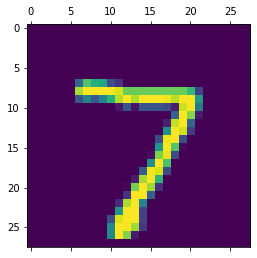

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [19]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    1,    0,    4,    4,    3,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [  11,    9,  926,   14,    8,    2,   12,   11,   34,    5],
       [   4,    0,   21,  927,    2,   14,    2,   10,   21,    9],
       [   2,    1,    4,    1,  922,    0,    9,    3,   10,   30],
       [  14,    3,    3,   44,   12,  752,   16,    6,   36,    6],
       [  15,    3,    6,    1,    7,    8,  913,    2,    3,    0],
       [   2,    6,   21,    7,    8,    0,    0,  946,    3,   35],
       [  12,   11,    7,   19,    9,   20,    9,   12,  868,    7],
       [  12,    7,    1,   11,   33,    5,    0,   20,    5,  915]])>

Text(69.0, 0.5, 'Truth')

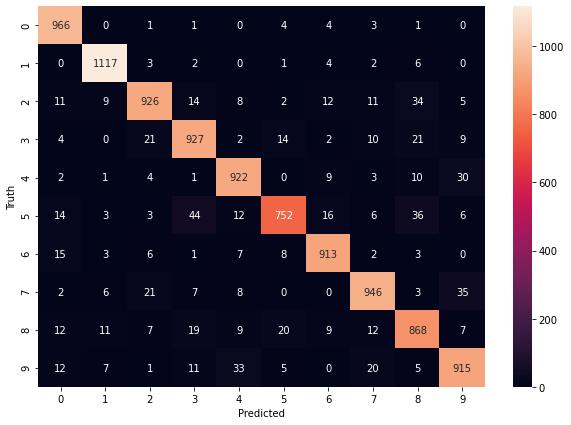

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using hidden layer

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4508 - accuracy: 0.8748
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1389 - accuracy: 0.9606
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0942 - accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0709 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0537 - accuracy: 0.9827


In [24]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.0805 - accuracy: 0.9759


[0.080485999584198, 0.9758999943733215]

Text(69.0, 0.5, 'Truth')

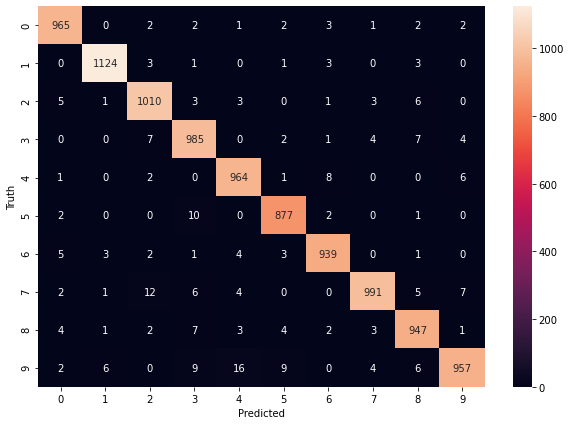

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')